### Imports

In [17]:
import json
import numpy as np
import matplotlib.pyplot as plt

### Dataset Exploration

In [18]:
def explore_bbox_dataset(coco_annotations_file_path):
    with open(coco_annotations_file_path, "r") as f:
        coco_annotations = json.load(f)

    # number of images
    images_info = coco_annotations['images']
    num_images = len(images_info)
    print(f"Dataset contains {num_images} images.")

    # Image sizes
    image_sizes = {(img['height'], img['width']) for img in images_info}
    print(f"Dataset contains images of the following sizes: {list(image_sizes)}")

    # extracting the boundign boxes
    bboxes = np.round(np.array([img['bbox'] for img in coco_annotations['annotations']])).astype(int)


    for img in coco_annotations['annotations']:
        if len(img['bbox']) != 4:
            print("WTF ", len(img['bbox']))

    # width distribution
    widths = bboxes[:, 2]
    print('\nWidth:')
    stats(widths, "Width")

    # height distribution
    heights = bboxes[:, 3]
    print('\nHeight:')
    stats(heights, "Height")

    # Area distribution
    areas = widths * heights
    print("\nArea:")
    stats(areas, "Area")

    # Width to Height Ratio
    aspect_ratios = widths / heights
    print("\nAspect Ratio: ")
    stats(aspect_ratios, "Aspect Ratio")

    # Squareness
    squareness = np.min(bboxes[:, 2:],axis=1)**2 / areas
    print("\nSquareness: ")
    stats(squareness, 'Squareness')

    # Heat map of bbox location
    bbox_to_heat_map(bboxes, 640, 640)

def stats(data, title):
    min = np.min(data)
    max = np.max(data)
    mean = np.mean(data)
    median = np.median(data)
    var = np.var(data)
    sd= np.std(data) 

    print(f'\t- min: {np.round(min, 3)}')
    print(f'\t- max: {np.round(max, 3)}')
    print(f'\t- mean: {np.round(mean, 3)}')
    print(f'\t- median: {np.round(median, 3)}')
    print(f'\t- variance: {np.round(var, 3)}')
    print(f'\t- SD: {np.round(sd, 3)}')

    plt.hist(data, color='b')
    plt.title(title)
    plt.show()

          
def bbox_to_heat_map(bbox_data, width, height):
    num_boxes = bbox_data.shape[0]
    heat_map = np.zeros((num_boxes, width, height))

    for i in range(num_boxes):
        x = bbox_data[i][0]
        y = bbox_data[i][1]
        w = bbox_data[i][2]
        h = bbox_data[i][3]
        heat_map[i, x:x+w, y:y+h] = 1

    heat_map = np.mean(heat_map, axis=0)
    plt.imshow(heat_map, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Bounding Box Location Average')
    plt.show()

    coverage_area = heat_map.copy()
    coverage_area[coverage_area>0] = 1

    plt.imshow(coverage_area, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title('Bounding Box Coverage')
    plt.show()
     
    return heat_map


## Exploring Training Set

Dataset contains 1502 images.
Dataset contains images of the following sizes: [(640, 640)]

Width:
	- min: 2
	- max: 372
	- mean: 116.49
	- median: 110.0
	- variance: 1969.121
	- SD: 44.375


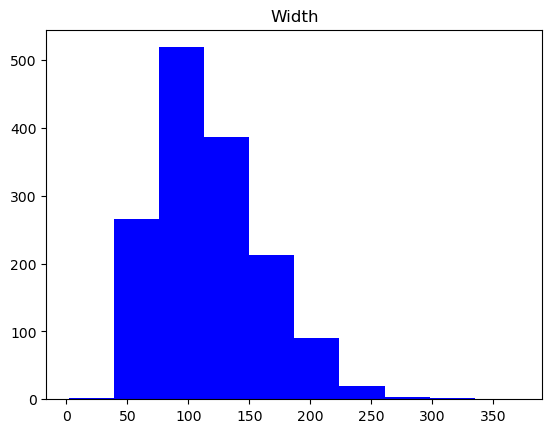


Height:
	- min: 8
	- max: 468
	- mean: 116.022
	- median: 109.0
	- variance: 1756.096
	- SD: 41.906


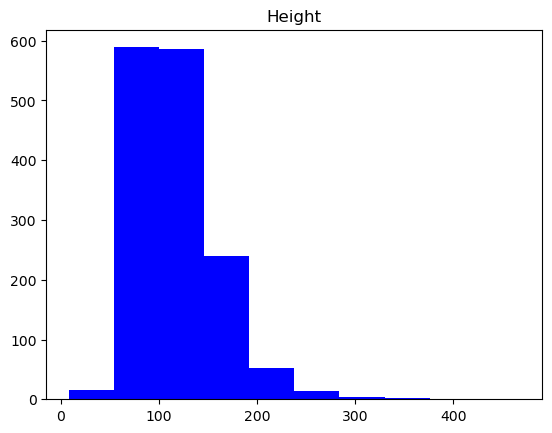


Area:
	- min: 16
	- max: 128700
	- mean: 14964.119
	- median: 12010.5
	- variance: 120548175.492
	- SD: 10979.443


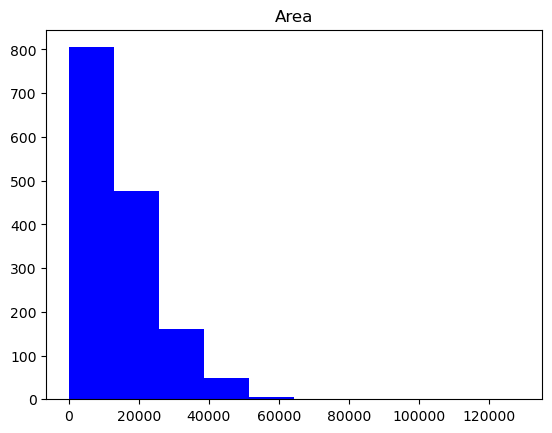


Aspect Ratio: 
	- min: 0.25
	- max: 3.351
	- mean: 1.017
	- median: 1.0
	- variance: 0.055
	- SD: 0.235


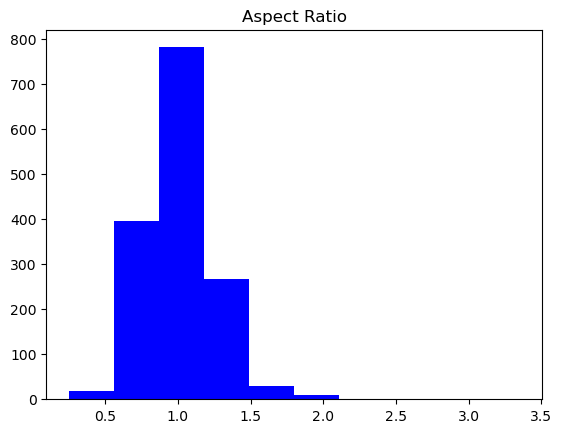


Squareness: 
	- min: 0.25
	- max: 1.0
	- mean: 0.848
	- median: 0.866
	- variance: 0.013
	- SD: 0.112


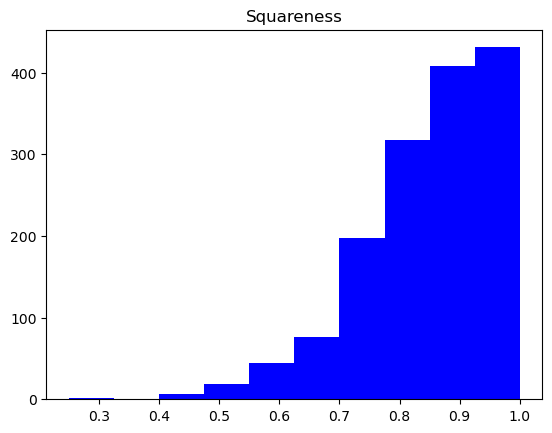

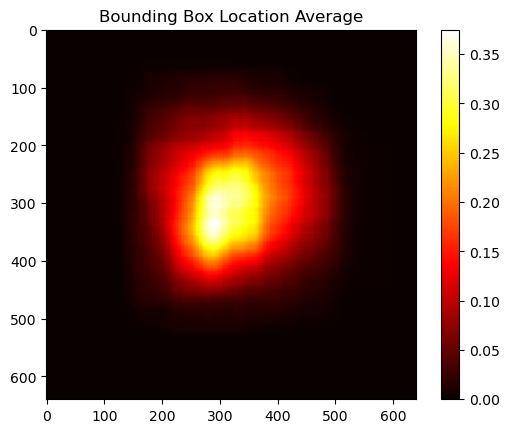

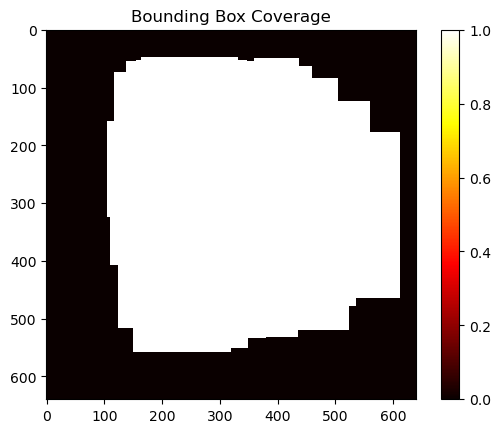

In [19]:
train_coco = explore_bbox_dataset('./../datasets/tumor-segmentation/train/_annotations.coco.json')

## Explorating Validation Set

Dataset contains 429 images.
Dataset contains images of the following sizes: [(640, 640)]

Width:
	- min: 35
	- max: 271
	- mean: 116.883
	- median: 110.0
	- variance: 2030.788
	- SD: 45.064


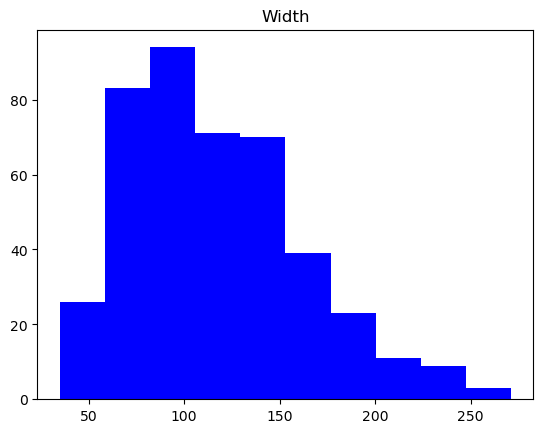


Height:
	- min: 50
	- max: 362
	- mean: 115.762
	- median: 109.0
	- variance: 1879.543
	- SD: 43.354


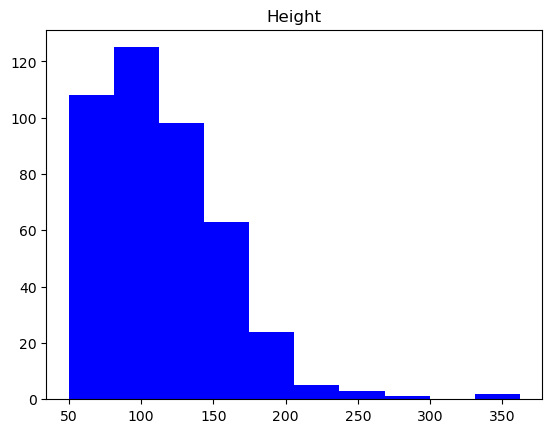


Area:
	- min: 1750
	- max: 65884
	- mean: 15010.189
	- median: 12240.0
	- variance: 113194935.067
	- SD: 10639.311


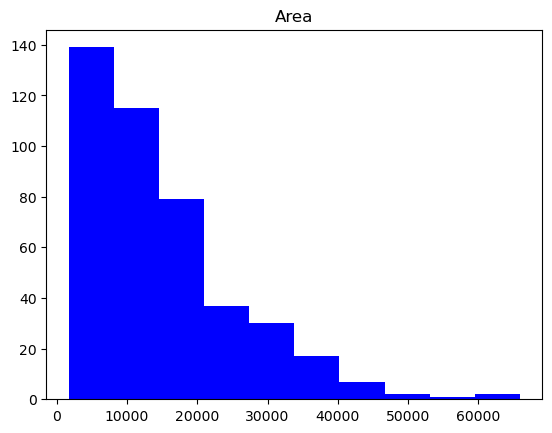


Aspect Ratio: 
	- min: 0.353
	- max: 2.034
	- mean: 1.023
	- median: 1.0
	- variance: 0.051
	- SD: 0.226


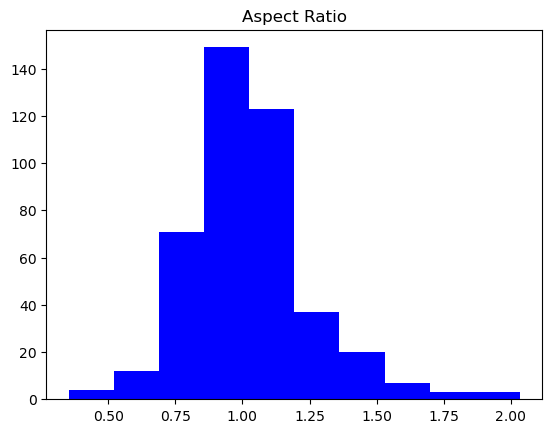


Squareness: 
	- min: 0.353
	- max: 1.0
	- mean: 0.858
	- median: 0.884
	- variance: 0.012
	- SD: 0.111


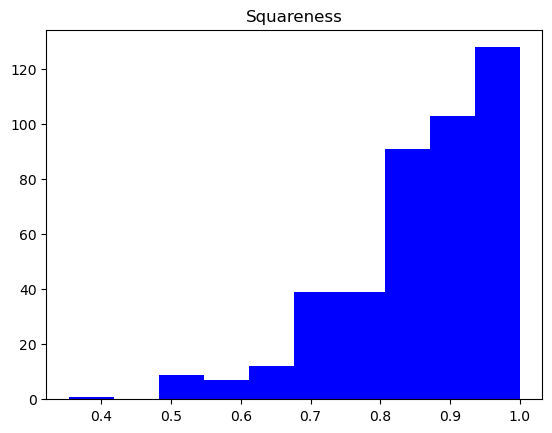

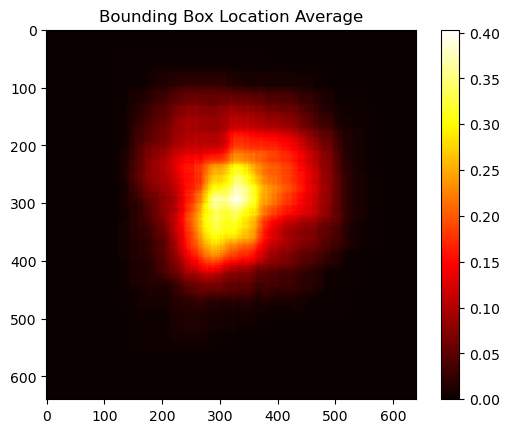

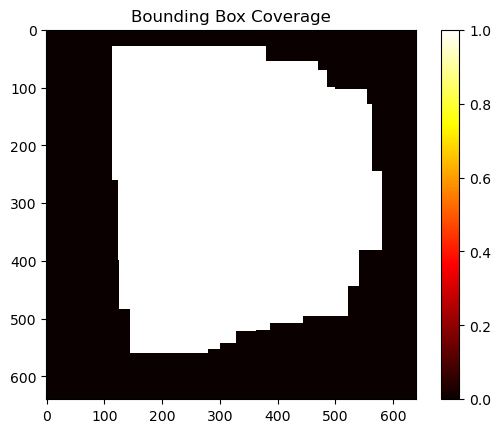

In [20]:
explore_bbox_dataset('./../datasets/tumor-segmentation/validation/_annotations.coco.json')

## Exploring Test Set

Dataset contains 215 images.
Dataset contains images of the following sizes: [(640, 640)]

Width:
	- min: 26
	- max: 326
	- mean: 115.405
	- median: 108.0
	- variance: 2540.185
	- SD: 50.4


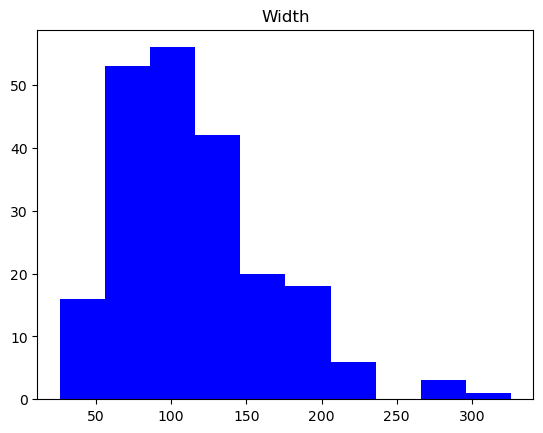


Height:
	- min: 30
	- max: 324
	- mean: 114.367
	- median: 105.0
	- variance: 1957.311
	- SD: 44.242


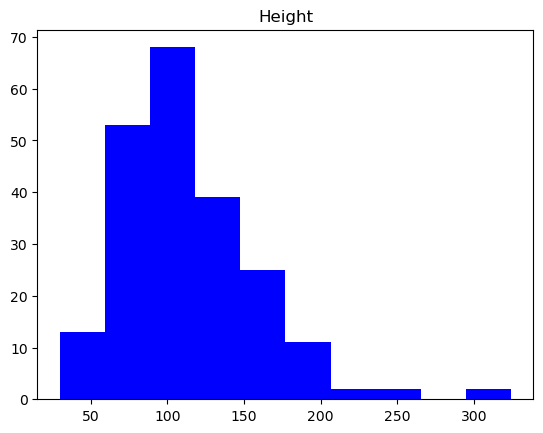


Area:
	- min: 780
	- max: 71280
	- mean: 14970.474
	- median: 11448.0
	- variance: 146377623.821
	- SD: 12098.662


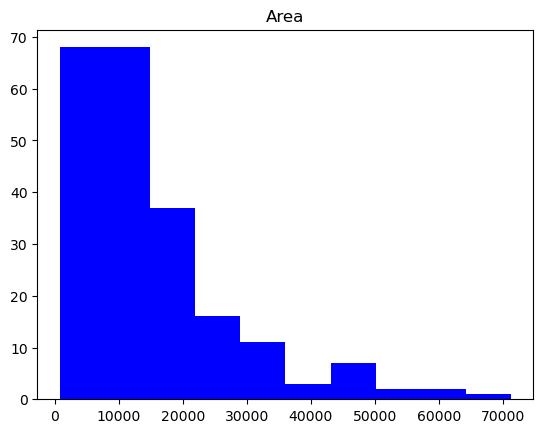


Aspect Ratio: 
	- min: 0.472
	- max: 1.71
	- mean: 1.011
	- median: 0.992
	- variance: 0.052
	- SD: 0.228


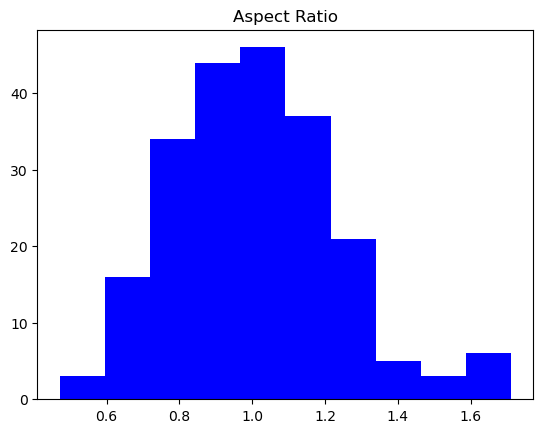


Squareness: 
	- min: 0.472
	- max: 1.0
	- mean: 0.843
	- median: 0.859
	- variance: 0.012
	- SD: 0.108


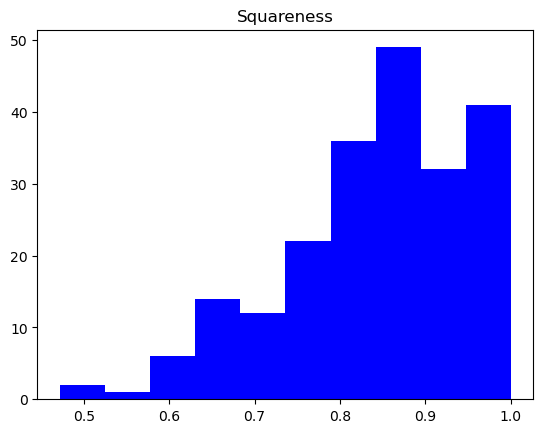

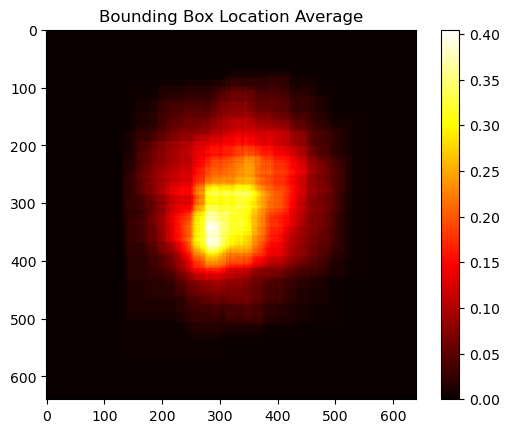

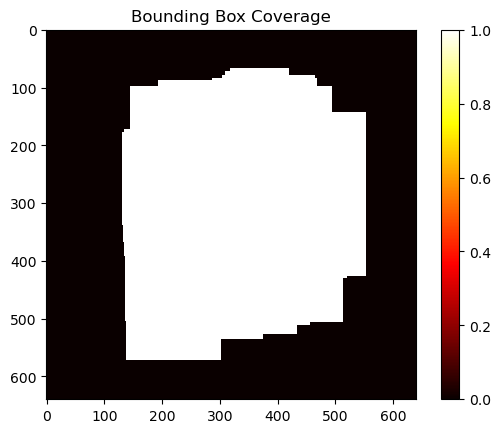

In [21]:
explore_bbox_dataset('./../datasets/tumor-segmentation/test/_annotations.coco.json')

## Generating Anchor Boxes
We need to ensure that all of the bounding boxes can be detected by at least 1 anchor with a sufficient IoU.

In [22]:
from torchvision.ops import box_iou
from torch import torch

def center_to_corner_box(bbox):
    x_max = bbox[:, 0] + bbox[:, 2]
    y_max = bbox[:, 1] + bbox[:, 3]
    result = bbox.copy()
    result[:, 2] = x_max
    result[:, 3] = y_max
    return result

def generate_anchores(image_size, scales, aspect_ratios, feature_map_size):
    anchor_boxes_centers = []  # For center coordinates
    anchor_boxes_corners = []  # For corner coordinates
    
    step_size = image_size / feature_map_size  # Size of one grid cell
    
    for x in range(feature_map_size):
        for y in range(feature_map_size):
            center_x = (x + 0.5) * step_size
            center_y = (y + 0.5) * step_size
            
            for scale in scales:
                for aspect_ratio in aspect_ratios:
                    box_height = image_size * scale / np.sqrt(aspect_ratio)
                    box_width = image_size * scale * np.sqrt(aspect_ratio)
                    
                    # Center coordinates with width and height
                    anchor_boxes_centers.append([center_x, center_y, box_width, box_height])
                    
                    # Convert to corner coordinates
                    x_min = center_x - box_width / 2
                    y_min = center_y - box_height / 2
                    x_max = center_x + box_width / 2
                    y_max = center_y + box_height / 2
                    anchor_boxes_corners.append([x_min, y_min, x_max, y_max])
    
    return np.array(anchor_boxes_centers), np.array(anchor_boxes_corners)

def analyze_anchor_boxes(bboxes_corners, anchore_corners, iou_cutoffs=[0.25, 0.5, 0.75, 0.9]):

    num_boxes = bboxes_corners.shape[0]

    # convert to 
    bboxes_corners = torch.tensor(bboxes_corners)
    anchore_corners = torch.tensor(anchore_corners)

    ious = box_iou(bboxes_corners, anchore_corners)

    for iou_cutoff in iou_cutoffs:
        print(f"\nAnalyzing cutoff IoU = {iou_cutoff}")

        positive_mask = ious >= iou_cutoff

        pos_per_sample = torch.sum(positive_mask, dim=1)
        avg_pos_per_sample = torch.mean(pos_per_sample.float()).item()
        coverage = torch.sum(pos_per_sample > 0).item() / num_boxes

        print(f"\t-Average Anchors Per Box: {avg_pos_per_sample}")
        print(f"\t-Ratio of Covered Boxes: {coverage}")

In [23]:
with open('./../datasets/tumor-segmentation/test/_annotations.coco.json', "r") as f:
    train_annotations = json.load(f)
train_bboxes = np.round(np.array([img['bbox'] for img in train_annotations['annotations']])).astype(int)
train_bboxes_corners = center_to_corner_box(train_bboxes)

In [24]:
image_size = 640
scales = [0.1, 0.2, 0.3]
aspect_ratios = [1]
feature_map_size = 20
anchore_centers, anchor_corners = generate_anchores(image_size, scales, aspect_ratios, feature_map_size)

print(f"Anchored boxes: {len(anchore_centers)}")
analyze_anchor_boxes(train_bboxes_corners, anchor_corners)

Anchored boxes: 1200

Analyzing cutoff IoU = 0.25
	-Average Anchors Per Box: 27.37674331665039
	-Ratio of Covered Boxes: 0.9953488372093023

Analyzing cutoff IoU = 0.5
	-Average Anchors Per Box: 3.883720874786377
	-Ratio of Covered Boxes: 0.9116279069767442

Analyzing cutoff IoU = 0.75
	-Average Anchors Per Box: 0.20000000298023224
	-Ratio of Covered Boxes: 0.17209302325581396

Analyzing cutoff IoU = 0.9
	-Average Anchors Per Box: 0.0
	-Ratio of Covered Boxes: 0.0


In [25]:
image_size = 640
scales = [0.1, 0.2, 0.3]
aspect_ratios = [0.66667, 1, 1.5]
feature_map_size = 20
anchore_centers, anchor_corners = generate_anchores(image_size, scales, aspect_ratios, feature_map_size)

print(f"Anchored boxes: {len(anchore_centers)}")
analyze_anchor_boxes(train_bboxes_corners, anchor_corners)

Anchored boxes: 3600

Analyzing cutoff IoU = 0.25
	-Average Anchors Per Box: 81.4186019897461
	-Ratio of Covered Boxes: 0.9953488372093023

Analyzing cutoff IoU = 0.5
	-Average Anchors Per Box: 10.437209129333496
	-Ratio of Covered Boxes: 0.9534883720930233

Analyzing cutoff IoU = 0.75
	-Average Anchors Per Box: 0.34418603777885437
	-Ratio of Covered Boxes: 0.2372093023255814

Analyzing cutoff IoU = 0.9
	-Average Anchors Per Box: 0.0
	-Ratio of Covered Boxes: 0.0


In [26]:
image_size = 640
scales = [0.1, 0.175, 0.25, 0.3]
aspect_ratios = [1]
feature_map_size = 20
anchore_centers, anchor_corners = generate_anchores(image_size, scales, aspect_ratios, feature_map_size)

print(f"Anchored boxes: {len(anchore_centers)}")
analyze_anchor_boxes(train_bboxes_corners, anchor_corners)

Anchored boxes: 1600

Analyzing cutoff IoU = 0.25
	-Average Anchors Per Box: 38.56278991699219
	-Ratio of Covered Boxes: 0.9953488372093023

Analyzing cutoff IoU = 0.5
	-Average Anchors Per Box: 5.50697660446167
	-Ratio of Covered Boxes: 0.9441860465116279

Analyzing cutoff IoU = 0.75
	-Average Anchors Per Box: 0.32093024253845215
	-Ratio of Covered Boxes: 0.25116279069767444

Analyzing cutoff IoU = 0.9
	-Average Anchors Per Box: 0.013953488320112228
	-Ratio of Covered Boxes: 0.013953488372093023


In [27]:
analyze_anchor_boxes(train_bboxes_corners, anchor_corners)


Analyzing cutoff IoU = 0.25
	-Average Anchors Per Box: 38.56278991699219
	-Ratio of Covered Boxes: 0.9953488372093023

Analyzing cutoff IoU = 0.5
	-Average Anchors Per Box: 5.50697660446167
	-Ratio of Covered Boxes: 0.9441860465116279

Analyzing cutoff IoU = 0.75
	-Average Anchors Per Box: 0.32093024253845215
	-Ratio of Covered Boxes: 0.25116279069767444

Analyzing cutoff IoU = 0.9
	-Average Anchors Per Box: 0.013953488320112228
	-Ratio of Covered Boxes: 0.013953488372093023
